In [15]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import matplotlib.pyplot as plt

import joblib

SEED = 2020
sse = []
users_spotify = pd.read_csv("./users_spotify_cluster.csv")
spotify_columns = ['spotify_danceability', 'spotify_energy', 'spotify_key',
       'spotify_loudness', 'spotify_mode', 'spotify_speechiness',
       'spotify_acousticness', 'spotify_instrumentalness', 'spotify_liveness',
       'spotify_valence', 'spotify_tempo', 'spotify_time_signature']

## KMeans Approach

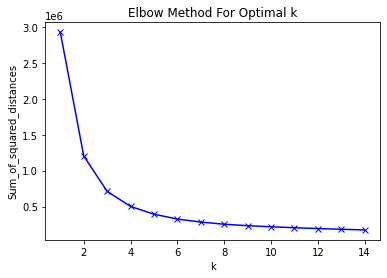

In [4]:
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, random_state=SEED)
    km = km.fit(users_spotify[spotify_columns])
    sse.append(km.inertia_)
    
plt.plot(K, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [16]:
km = KMeans(n_clusters=4, random_state=SEED)
km = km.fit(users_spotify[spotify_columns])

joblib.dump(km, "user_clustering.joblib")

['user_clustering.joblib']

In [7]:
km.cluster_centers_

array([[ 5.68867128e-01,  6.14895768e-01,  5.27252129e+00,
        -8.75544883e+00,  6.61169064e-01,  8.01749490e-02,
         2.89717951e-01,  1.40943241e-01,  1.99309207e-01,
         4.97410558e-01,  1.11097923e+02,  3.91691614e+00],
       [ 5.45004968e-01,  6.80592435e-01,  5.26006159e+00,
        -7.83634351e+00,  6.73408727e-01,  7.17833413e-02,
         2.19066968e-01,  1.35363642e-01,  2.02117623e-01,
         5.01400879e-01,  1.26988586e+02,  3.92389083e+00],
       [ 5.12926622e-01,  7.26347316e-01,  5.23747760e+00,
        -7.19566474e+00,  6.72780455e-01,  7.41611668e-02,
         1.74183157e-01,  1.19803169e-01,  2.08286867e-01,
         4.93125078e-01,  1.36243425e+02,  3.92263886e+00],
       [ 5.62370334e-01,  6.49749754e-01,  5.25723561e+00,
        -8.26519143e+00,  6.71046786e-01,  7.32194115e-02,
         2.51491664e-01,  1.38710394e-01,  1.99609312e-01,
         5.04880217e-01,  1.19597030e+02,  3.92371182e+00]])

In [14]:
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, users_spotify[spotify_columns])
closest

array([12674, 26614, 29986,  9183], dtype=int64)

In [13]:
users_spotify.iloc[closest]

,user_id,user_id_idx,spotify_danceability,spotify_energy,spotify_key,spotify_loudness,spotify_mode,spotify_speechiness,spotify_acousticness,spotify_instrumentalness,spotify_liveness,spotify_valence,spotify_tempo,spotify_time_signature
12674,4d9adfae71c0e9dd92e3153398e46971b5ca6147,12675,0.661125,0.550438,5.375000,-8.733063,0.625000,0.063094,0.381292,0.078601,0.125400,0.599150,111.212688,4.000
26614,a32195a405ee637c92cf7cd82000d02e1d1dd4da,26617,0.525077,0.751462,5.153846,-7.718308,0.769231,0.071046,0.169013,0.095214,0.172877,0.505692,126.904231,4.000
29986,b79a4010ba71f8a0a17f892840c66d55f0c8ae04,29990,0.480059,0.695059,5.411765,-7.389176,0.647059,0.041171,0.177806,0.147730,0.142635,0.516353,136.179882,4.000
9183,38789df29f2d58136c11ec9417b8a5adf0017eb1,9183,0.599375,0.648625,5.375000,-8.193062,0.562500,0.061975,0.328203,0.186334,0.247394,0.534937,119.544313,3.875


# Nearest neighbours approach

In [28]:
from sklearn.neighbors import NearestNeighbors

number_of_neighbours = 5 # self is included
user = users_spotify.iloc[0]

knn = NearestNeighbors(n_neighbors=number_of_neighbours)
knn.fit(users_spotify[spotify_columns])

dist, indices = knn.kneighbors([user[spotify_columns]])

print(user)
users_spotify.iloc[indices[0]]

user_id                     00020e8ba3f9041deed64ec9c60b26ff6bf41c66
user_id_idx                                                        0
spotify_danceability                                        0.667684
spotify_energy                                                 0.646
spotify_key                                                  5.73684
spotify_loudness                                            -9.72358
spotify_mode                                                0.631579
spotify_speechiness                                         0.158658
spotify_acousticness                                        0.267152
spotify_instrumentalness                                   0.0465396
spotify_liveness                                            0.184974
spotify_valence                                             0.593842
spotify_tempo                                                126.797
spotify_time_signature                                             4
Name: 0, dtype: object


,user_id,user_id_idx,spotify_danceability,spotify_energy,spotify_key,spotify_loudness,spotify_mode,spotify_speechiness,spotify_acousticness,spotify_instrumentalness,spotify_liveness,spotify_valence,spotify_tempo,spotify_time_signature
0,00020e8ba3f9041deed64ec9c60b26ff6bf41c66,0,0.667684,0.646000,5.736842,-9.723579,0.631579,0.158658,0.267152,0.046540,0.184974,0.593842,126.797211,4.000000
38262,e9be7dc31c5f9651bed36308ae4b8412d38abde4,38266,0.540333,0.597467,5.466667,-9.811267,0.666667,0.043853,0.226431,0.009511,0.218767,0.605067,126.642400,4.000000
14099,564004ddac4c508e36fc89e74d463a8559113cef,14100,0.593211,0.519684,5.789474,-9.611053,0.789474,0.077200,0.352807,0.053283,0.206205,0.482968,126.974526,3.842105
39629,f23cc1fe66ed7780d7b2eac021f013debc4efb83,39634,0.609278,0.590550,5.888889,-9.941722,0.722222,0.122828,0.288464,0.014552,0.194817,0.562111,126.540389,3.944444
24159,944bf0ef4827e3ac4bbe5f25fd1a5c0136266767,24162,0.581765,0.589865,5.647059,-9.789235,0.882353,0.066276,0.332204,0.213974,0.156018,0.395088,126.754706,4.000000


## users_spotify

In [ ]:
train = pd.read_csv("../experiments/triplets/train.csv")
test = pd.read_csv("../experiments/triplets/test.csv")
df = pd.concat([train, test])

songs = pd.read_csv("./songs_artist.csv")
df = df.merge(songs, on="song_id")
df['user_id_idx'] = df['user_id_idx'].astype(str)

spotify = pd.read_csv('./spotify.csv')

In [ ]:
users_spotify = (
    df
    .sort_values('play_count',ascending = False)
    .groupby('user_id')
    .head(20) # get top 20 per user
    .merge(spotify, on='song_id')
    .groupby(['user_id', 'user_id_idx'])[spotify.columns[1:]]
    .mean()
    .reset_index()
)
users_spotify.to_csv("users_spotify_cluster.csv", index=False)